In [ ]:
from google.colab import files
data = files.upload()


Saving Rain_data.csv to Rain_data (1).csv


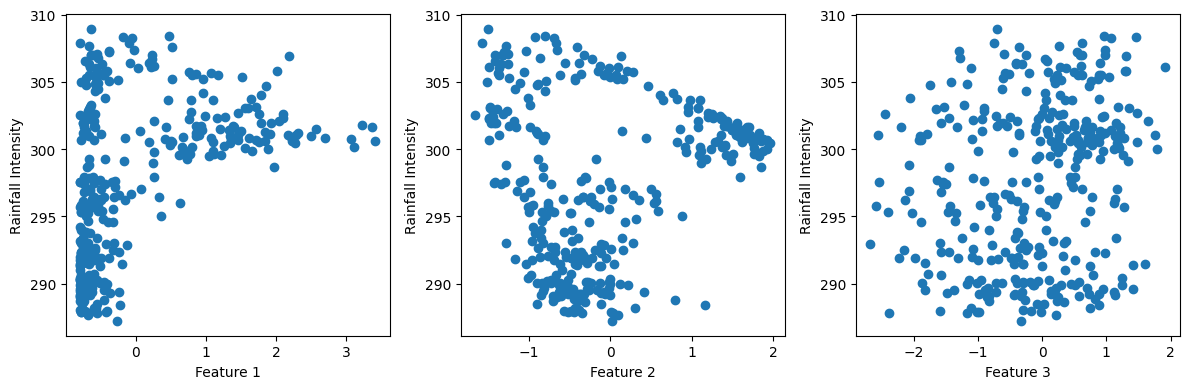

Iteration 0: Train Loss = 294.63055960697994, Val Loss = 295.5019980576844
Iteration 100: Train Loss = 107.939816352823, Val Loss = 114.15488313597987
Iteration 200: Train Loss = 40.81781015735223, Val Loss = 45.688601335304185
Iteration 300: Train Loss = 16.595511866673913, Val Loss = 19.821852560491763
Iteration 400: Train Loss = 8.184941476544994, Val Loss = 10.07413623007896
Iteration 500: Train Loss = 5.601428025865107, Val Loss = 6.533617640131049
Iteration 600: Train Loss = 4.90486851926022, Val Loss = 5.327359168569197
Iteration 700: Train Loss = 4.716985561647441, Val Loss = 4.922986418632813
Iteration 800: Train Loss = 4.662687342308288, Val Loss = 4.7803782729195605
Iteration 900: Train Loss = 4.646096212656973, Val Loss = 4.725942050577851


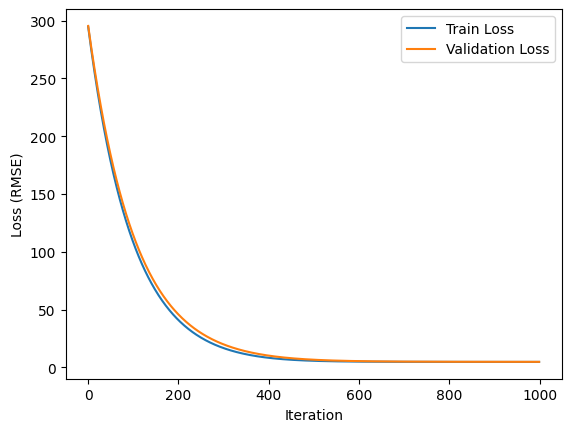

Training Accuracy: 0.3962191062452418
Validation Accuracy: 0.30734449823355037


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalize_features(X):

    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return X_normalized, mean, std

# Read the dataset
data = pd.read_csv('Rain_data.csv')

# Extract input features (columns 0, 1, and 2) and target variable (column 3)
X = data.iloc[:, 0:3].values
y = data.iloc[:, 3].values

# Normalize the input features
X_normalized, mean, std = normalize_features(X)

# Split the dataset into training and validation sets (70:30 ratio)
split_ratio = 0.7
split_index = int(split_ratio * len(X_normalized))

X_train = X_normalized[:split_index]
y_train = y[:split_index]
X_val = X_normalized[split_index:]
y_val = y[split_index:]

def plot_data(X, y):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], y)
    plt.xlabel('Feature 1')
    plt.ylabel('Rainfall Intensity')

    plt.subplot(1, 3, 2)
    plt.scatter(X[:, 1], y)
    plt.xlabel('Feature 2')
    plt.ylabel('Rainfall Intensity')

    plt.subplot(1, 3, 3)
    plt.scatter(X[:, 2], y)
    plt.xlabel('Feature 3')
    plt.ylabel('Rainfall Intensity')

    plt.tight_layout()
    plt.show()

# Plot the data
plot_data(X_train, y_train)

def predict(X, weights):

    X_extended = np.hstack((np.ones((len(X), 1)), X))  # Add a column of ones for the bias term
    return np.dot(X_extended, weights)

def cost_function(X, y, weights):

    predictions = predict(X, weights)
    error = predictions - y
    rmse = np.sqrt(np.mean(error**2))
    return rmse

def update_weights(X, y, weights, learning_rate):

    X_extended = np.hstack((np.ones((len(X), 1)), X))  # Add a column of ones for the bias term
    predictions = np.dot(X_extended, weights)
    error = predictions - y
    gradient = np.dot(X_extended.T, error) / len(X)
    updated_weights = weights - learning_rate * gradient
    return updated_weights


def linear_regression(X_train, y_train, X_val, y_val, learning_rate, num_iterations):

    # Initialize weights (including the bias term)
    num_features = X_train.shape[1]
    weights = np.zeros(num_features + 1)

    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        # Update weights using gradient descent
        weights = update_weights(X_train, y_train, weights, learning_rate)

        # Compute the cost (RMSE) for training and validation sets
        train_loss = cost_function(X_train, y_train, weights)
        val_loss = cost_function(X_val, y_val, weights)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Print progress
        if iteration % 100 == 0:
            print(f'Iteration {iteration}: Train Loss = {train_loss}, Val Loss = {val_loss}')

    # Plot cost function against the number of iterations
    plt.plot(range(num_iterations), train_losses, label='Train Loss')
    plt.plot(range(num_iterations), val_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (RMSE)')
    plt.legend()
    plt.show()

    return weights

# Train the model
learning_rate = 0.01
num_iterations = 1000
weights = linear_regression(X_train, y_train, X_val, y_val, learning_rate, num_iterations)

def accuracy(y_true, y_pred):

    mean = np.mean(y_true)
    total_sum_squares = np.sum((y_true - mean)**2)
    residual_sum_squares = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (residual_sum_squares / total_sum_squares)
    return r_squared

# Predict on training and validation sets
y_train_pred = predict(X_train, weights)
y_val_pred = predict(X_val, weights)

# Calculate accuracy (R^2 score)
train_accuracy = accuracy(y_train, y_train_pred)
val_accuracy = accuracy(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')
